<a href="https://colab.research.google.com/github/Iam-Iman/predictive_insights/blob/main/Predictive_Insights_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
start_time = time.time()


Zindi, Predictive Insights Competition Entry \
by Iman Ngwepe-Ntshibida

# Introduction

This is a step by step approach to the Predictive Insights competition.

Youth unemployment and under-employment is a major concern for any developing country, and serves as an important predictor of economic health and prosperity. Being able to predict, and understand,  which young people will find employment and which ones will require additional help,  helps promote evidence-based decision-making, supports economic empowerment, and allows young people to thrive in their chosen careers.

The objective of this challenge is to build a machine learning model that predicts youth employment, based on data from labour market surveys in South Africa.

This solution will help organisations like Predictive Insights achieve a baseline prediction of young peoples’ employment outcomes, allowing them to design and test interventions to help youth make a transition into the labour market or to improve their earnings.

# The Data

The data for this challenge comes from four rounds of a survey of youth in the South African labour market, conducted at 6-month intervals. The survey contains numerical, categorical and free-form text responses. You will also receive additional demographic information such as age and information about school level and results.

Each person in the dataset was surveyed one year prior (the ‘baseline’ data) to the follow-up survey. We are interested in predicting whether a person is employed at the follow-up survey based on their labour market status and other characteristics during the baseline.

The training set consists of one row or observation per individual - information collected at baseline plus only the target outcome (whether they were employed or not) one year later. The test set consists of the data collected at baseline without the target outcome.

The objective of this challenge is to predict whether a young person will be employed, one year after the baseline survey, based on their demographic characteristics, previous and current labour market experience and education outcomes, and to deliver an easy-to-understand and insightful solution to the data team at Predictive Insights.


# Exploratory Data Analysis

## Load libraries

In [2]:
import pandas as pd
import numpy as np

## Load data

In [3]:
train_df = pd.read_csv("Train.csv")
test_df = pd.read_csv("Test.csv")
print(train_df.shape, test_df.shape)
train_df.head()

(4020, 21) (1934, 20)


,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,...,Math,Mathlit,Additional_lang,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth,Target
0,Id_eqz61wz7yn,2022-02-23,2,studying,NaN,Rural,Mpumalanga,1.0,0.0,0.0,...,0 - 29 %,NaN,50 - 59 %,NaN,0 - 29 %,1,1,2000,5,0
1,Id_kj5k3g5wud,2023-02-06,4,unemployed,427.0,Suburb,North West,1.0,0.0,0.0,...,30 - 39 %,NaN,40 - 49 %,NaN,30 - 39 %,1,1,1989,4,1
2,Id_9h0isj38y4,2022-08-08,3,other,NaN,Urban,Free State,1.0,0.0,0.0,...,30 - 39 %,NaN,40 - 49 %,NaN,30 - 39 %,0,1,1996,7,1
3,Id_5ch3zwpdef,2022-03-16,2,unemployed,810.0,Urban,Eastern Cape,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,1,2000,1,0
4,Id_g4elxibjej,2023-03-22,4,studying,NaN,Urban,Limpopo,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,1,1998,12,0


In [4]:
# 'is_train' column to distinguish between train and test data
train_df['is_train'] = 1
test_df['is_train'] = 0

# concatenate the train and test sets while preserving the separation
combo_df = pd.concat([train_df, test_df], ignore_index=True, sort=False)


In [5]:
combo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5954 entries, 0 to 5953
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Person_id        5954 non-null   object 
 1   Survey_date      5954 non-null   object 
 2   Round            5954 non-null   int64  
 3   Status           5954 non-null   object 
 4   Tenure           3828 non-null   float64
 5   Geography        5954 non-null   object 
 6   Province         5954 non-null   object 
 7   Matric           4422 non-null   float64
 8   Degree           3235 non-null   float64
 9   Diploma          3264 non-null   float64
 10  Schoolquintile   3475 non-null   float64
 11  Math             1492 non-null   object 
 12  Mathlit          1968 non-null   object 
 13  Additional_lang  2969 non-null   object 
 14  Home_lang        565 non-null    object 
 15  Science          1086 non-null   object 
 16  Female           5954 non-null   int64  
 17  Sa_citizen    

## Data Cleaning

In [6]:
combo_df.duplicated().sum()

0

In [7]:
combo_df.dtypes

Person_id           object
Survey_date         object
Round                int64
Status              object
Tenure             float64
Geography           object
Province            object
Matric             float64
Degree             float64
Diploma            float64
Schoolquintile     float64
Math                object
Mathlit             object
Additional_lang     object
Home_lang           object
Science             object
Female               int64
Sa_citizen           int64
Birthyear            int64
Birthmonth           int64
Target             float64
is_train             int64
dtype: object

In [8]:
combo_df['Survey_date'] = pd.to_datetime(combo_df['Survey_date'])
combo_df['Survey_date'].dtype

dtype('<M8[ns]')

In [9]:
combo_df.isna().sum()/len(combo_df)

Person_id          0.000000
Survey_date        0.000000
Round              0.000000
Status             0.000000
Tenure             0.357071
Geography          0.000000
Province           0.000000
Matric             0.257306
Degree             0.456668
Diploma            0.451797
Schoolquintile     0.416359
Math               0.749412
Mathlit            0.669466
Additional_lang    0.501344
Home_lang          0.905106
Science            0.817602
Female             0.000000
Sa_citizen         0.000000
Birthyear          0.000000
Birthmonth         0.000000
Target             0.324824
is_train           0.000000
dtype: float64

In [10]:
cols_isna = combo_df.columns[combo_df.isna().sum()>0]
print(cols_isna)

Index(['Tenure', 'Matric', 'Degree', 'Diploma', 'Schoolquintile', 'Math',
       'Mathlit', 'Additional_lang', 'Home_lang', 'Science', 'Target'],
      dtype='object')


In [11]:
threshold = 0.50 * len(combo_df)

# drop columns with more missing values than the threshold
combo_df = combo_df.dropna(thresh=threshold, axis=1)

# filtered DataFrame shape
print("New Data Shape:", combo_df.shape)

New Data Shape: (5954, 17)


In [12]:
combo_df.columns

Index(['Person_id', 'Survey_date', 'Round', 'Status', 'Tenure', 'Geography',
       'Province', 'Matric', 'Degree', 'Diploma', 'Schoolquintile', 'Female',
       'Sa_citizen', 'Birthyear', 'Birthmonth', 'Target', 'is_train'],
      dtype='object')

In [13]:
## fill NaN
from sklearn.impute import SimpleImputer
num_impute = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
num_impute.fit([['Tenure', 'Matric', 'Degree', 'Diploma', 'Schoolquintile']])
combo_df[['Tenure', 'Matric', 'Degree','Diploma', 'Schoolquintile']] = num_impute.fit_transform(combo_df[['Tenure', 'Matric','Degree', 'Diploma', 'Schoolquintile']])

#cat_impute = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
#cat_impute.fit([['Math', 'Mathlit', 'Additional_lang', 'Home_lang', 'Science']])
#combo_df[['Math', 'Mathlit', 'Additional_lang', 'Home_lang', 'Science']] = cat_impute.fit_transform(combo_df[['Math', 'Mathlit', 'Additional_lang', 'Home_lang', 'Science']])
combo_df.isna().sum()


Person_id            0
Survey_date          0
Round                0
Status               0
Tenure               0
Geography            0
Province             0
Matric               0
Degree               0
Diploma              0
Schoolquintile       0
Female               0
Sa_citizen           0
Birthyear            0
Birthmonth           0
Target            1934
is_train             0
dtype: int64

# EDA

In [14]:
# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# set custom palette 1
custom_p1 = ['#6bcec1']
sns.set_palette(custom_p1)
# set custom palette 2
custom_p2 = ['#f0483b','#272c52']
sns.set_palette(custom_p2)

## The Target

- Look into the distribution of the `Target`

In [15]:
train_df['Target'].value_counts()

0    2927
1    1093
Name: Target, dtype: int64

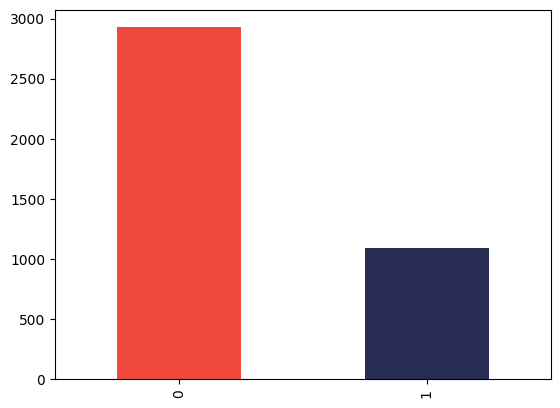

In [16]:
train_df['Target'].value_counts().plot(kind='bar', color= ['#f0483b','#272c52']);

- We have more negative outcomes than positives, showing that the majority of the respondents were not employed.

### Status

unemployed                1775
studying                   966
wage employed              763
other                      278
self employed              200
employment programme        31
wage and self employed       7
Name: Status, dtype: int64


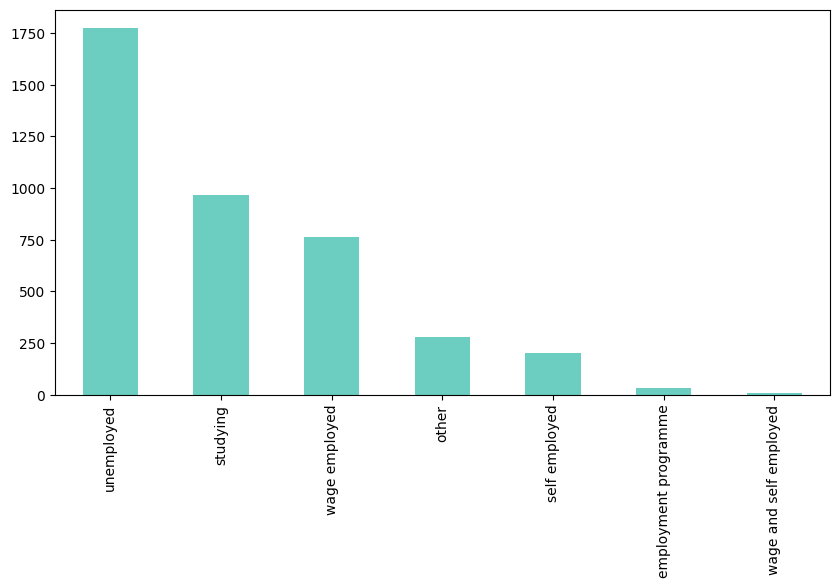

In [17]:
print(train_df['Status'].value_counts())

plt.figure(figsize=(10, 5))
train_df['Status'].value_counts().plot(kind='bar', color= ['#6bcec1']);


- An ovewhelming majority of the candidates are unemployed.

### Gender

In [18]:
# exploring the gender
print(train_df['Female'].value_counts(normalize=True))

1    0.564428
0    0.435572
Name: Female, dtype: float64


In [19]:
# cross tab of Female and Target
cross_tb = pd.crosstab(train_df['Female'], train_df['Target'])
print(cross_tb)

Target     0    1
Female           
0       1183  568
1       1744  525


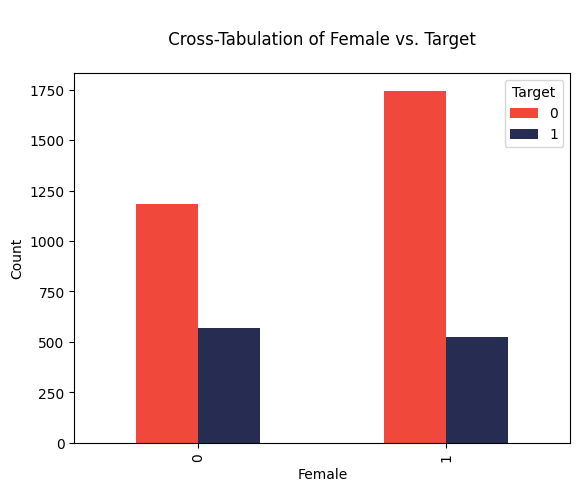

In [20]:
# bar chart
cross_tb.plot(kind='bar', stacked=False, color=['#f0483b', '#272c52'])
plt.xlabel('Female')
plt.ylabel('Count')
plt.title('\n Cross-Tabulation of Female vs. Target \n');


- Approximately 56% of participants were male, and more males (1744) are more likely to be employed (Target 1) compared to females (525).

### Sa Citizen

In [21]:
train_df['Sa_citizen'].value_counts()

1    4018
0       2
Name: Sa_citizen, dtype: int64

The values where `sa_citizen` are 0 are very underrepresented. It could be a good idea to remove the rows where `sa_citizen` = 0 but that could lead to a loss of data. Alternatively, one could consider removing the column altogether.



### Geography

Urban     2797
Rural      803
Suburb     420
Name: Geography, dtype: int64


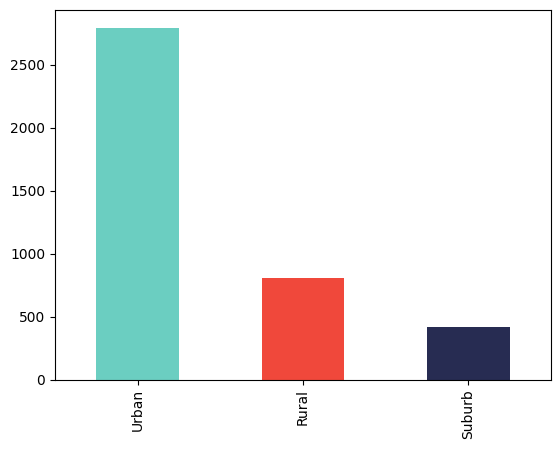

In [22]:
# value counts of geography

print(train_df['Geography'].value_counts())

train_df['Geography'].value_counts().plot(kind='bar', color= ['#6bcec1','#f0483b','#272c52']);

- There are 3 geographical locations: Rural, Suburb, and Urban. The majority come from urban areas.



### Tenure

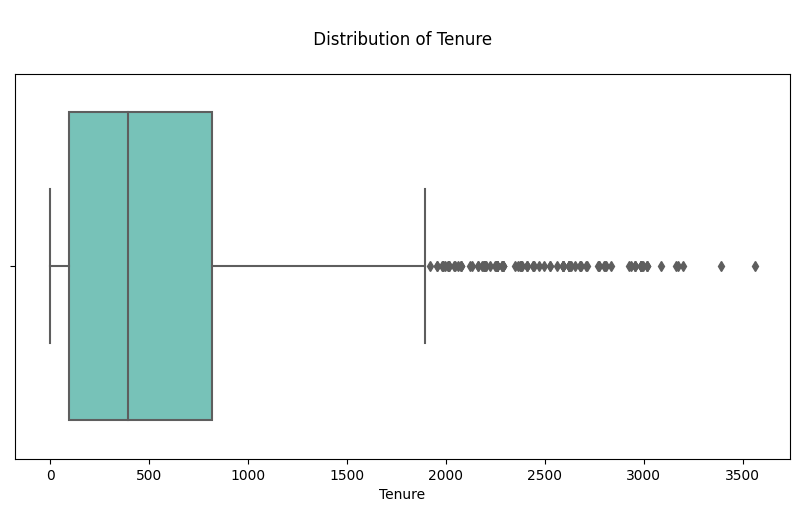

In [23]:
# box plot
plt.figure(figsize=(10, 5))
sns.boxplot(data=train_df, x='Tenure', color='#6bcec1')
plt.title('\n Distribution of Tenure \n');

In [24]:
train_df['Tenure'].describe()

count    2626.000000
mean      582.883092
std       621.220657
min         0.000000
25%        95.000000
50%       395.000000
75%       819.000000
max      3560.000000
Name: Tenure, dtype: float64

- The tenure distribution is right-skewed, with most individuals having shorter tenures (around 395 days) and a few with longer tenures (up to 3560 days), resulting in a higher mean and wider spread.

### Birthyear

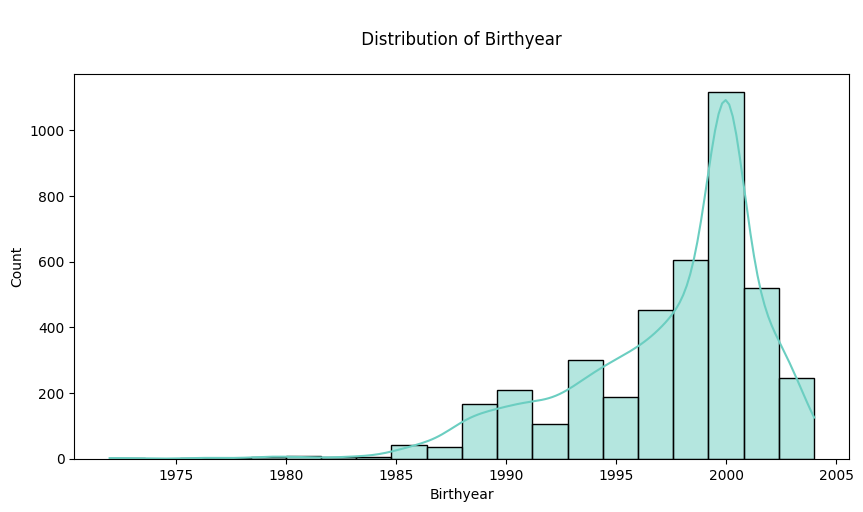

In [25]:
# distribution of Bithyear
plt.figure(figsize=(10, 5))
sns.histplot(data=train_df, x='Birthyear', bins=20, kde=True, color='#6bcec1')
plt.title('\n Distribution of Birthyear \n');

In [26]:
# statistical summary of Birthyear
train_df['Birthyear'].describe()

count    4020.000000
mean     1997.462935
std         4.378334
min      1972.000000
25%      1995.000000
50%      1999.000000
75%      2000.000000
max      2004.000000
Name: Birthyear, dtype: float64

In [27]:
train_df['Birthyear'].value_counts()

2000    1116
1999     306
1998     299
2001     261
2002     260
1997     241
1996     211
1995     189
2003     188
1994     167
1993     134
1991     112
1992     107
1990      98
1989      90
1988      77
2004      57
1987      35
1986      28
1985      15
1983       5
1979       5
1984       4
1980       4
1981       3
1977       2
1976       2
1972       2
1982       1
1973       1
Name: Birthyear, dtype: int64

- The distribution of birth years is left-skewed, primarily clustered between 1995 and 2000. Outliers are predominantly individuals born before 1995, typically classified as older and outside the South African legal youth range of 18-35 years.

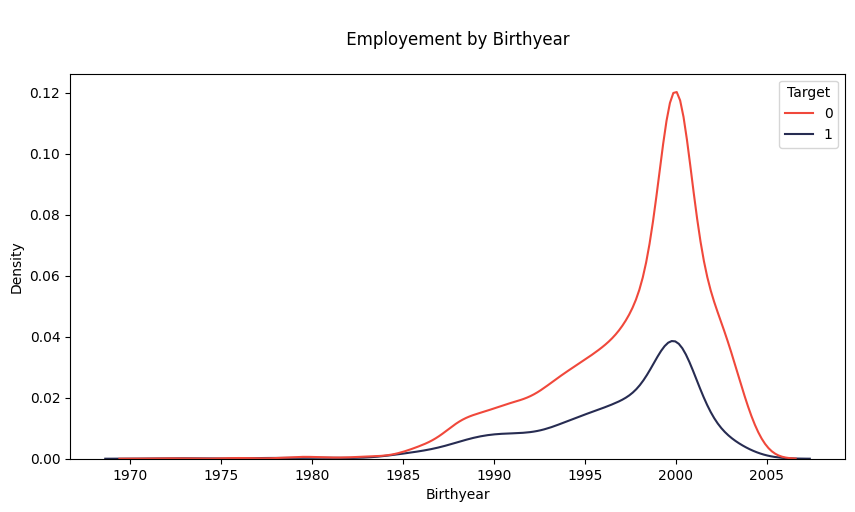

In [28]:
# plot of Birthyear by Target
plt.figure(figsize=(10, 5))
sns.kdeplot(data=train_df, x='Birthyear', palette=custom_p2, hue='Target')
plt.title('\n Employement by Birthyear \n')
plt.show()

- Both the positive and negative plots exhibit similarities, with a peak around the year 2000. However, the negative outcome plot has a higher count in terms of numbers.

### Province

In [29]:
# Calculate the percentage of positive income for each province

df_province = train_df.groupby('Province').agg(percentage=('Target', 'mean')).reset_index()
df_province['percentage'] = df_province['percentage'] * 100
df_province = df_province.sort_values('percentage', ascending=False).reset_index()

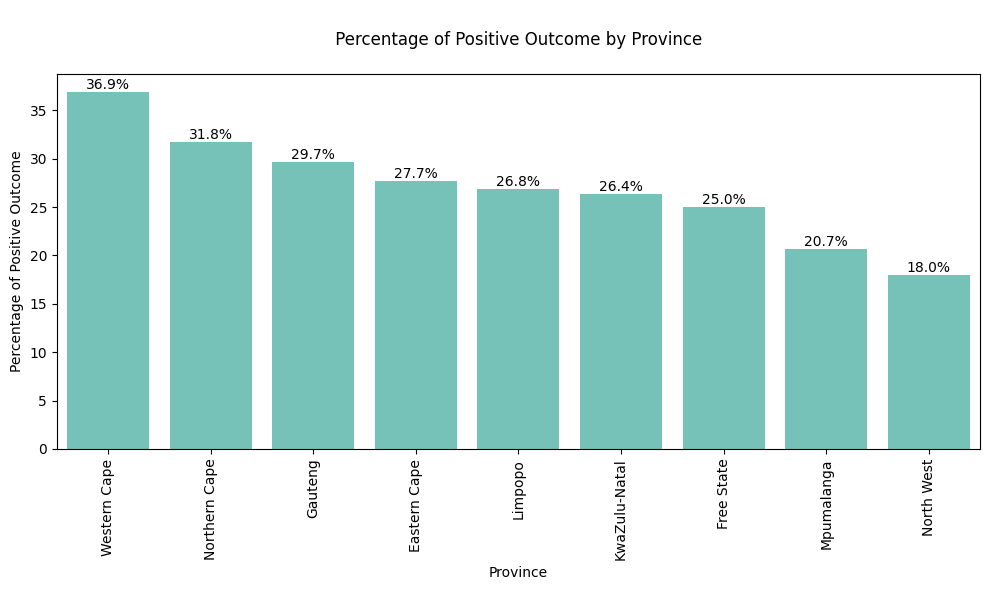

In [30]:
# barplot
plt.figure(figsize=(10, 6))

sns.barplot(data=df_province, x='Province', y='percentage', palette=custom_p1)
plt.xlabel('Province')
plt.ylabel('Percentage of Positive Outcome')
plt.title('\n Percentage of Positive Outcome by Province \n')

# percentage labels on top of the bars
for index, row in df_province.sort_values('percentage', ascending=False).iterrows():
    plt.text(row.name, row.percentage, f"{round(row.percentage, 1)}%", ha='center', va='bottom')

plt.xticks(rotation=90, ha='center')
plt.tight_layout();


In the training data, candidates from the Western Cape are the most likely to get a positive outcome, while those from the North West province are least likely.

In [31]:
# Calculate the percentage of positive income for each `geography`

df_geography = train_df.groupby('Geography').agg(percentage=('Target', 'mean')).reset_index()
df_geography['percentage'] = df_geography['percentage'] * 100
df_geography = df_geography.sort_values('percentage', ascending=False).reset_index()

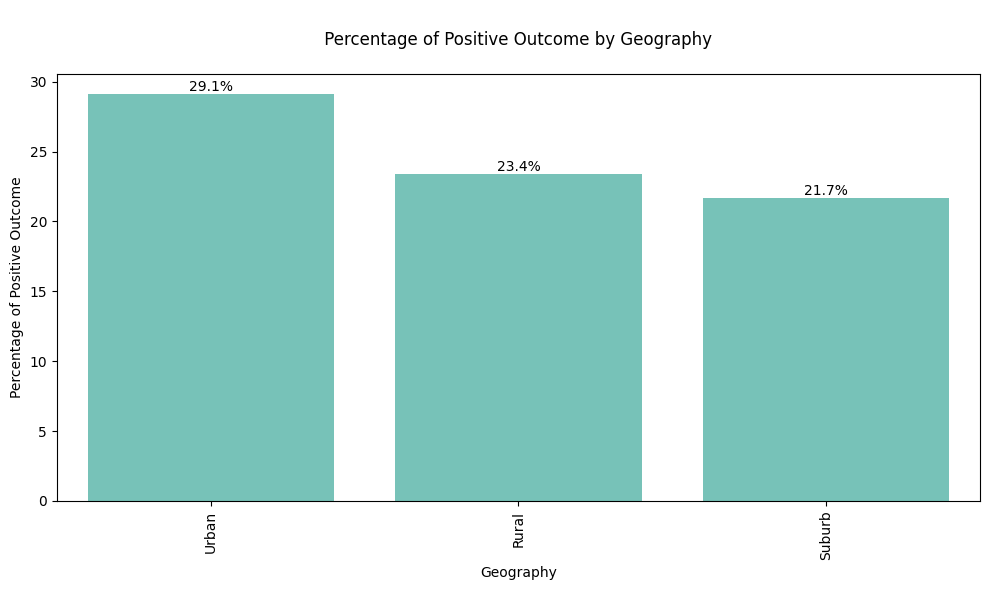

In [32]:
# bar plot of Geography percentage
plt.figure(figsize=(10, 6))

sns.barplot(data=df_geography, x='Geography', y='percentage', palette=custom_p1)
plt.xlabel('Geography')
plt.ylabel('Percentage of Positive Outcome')
plt.title('\n Percentage of Positive Outcome by Geography \n')

# percentage labels on top of the bars
for index, row in df_geography.iterrows():
    plt.text(row.name, row.percentage, f"{round(row.percentage, 1)}%", ha='center', va='bottom')

plt.xticks(rotation=90, ha='center')
plt.tight_layout();


We see that people from "Urban" areas are most likely to get a positive outcome.


### Gender percentage outcome

In [33]:
df_female = train_df.groupby('Female').agg(percentage=('Target', 'mean')).reset_index()
df_female['percentage'] = df_female['percentage'] * 100
df_female = df_female.sort_values('percentage', ascending=False).reset_index()

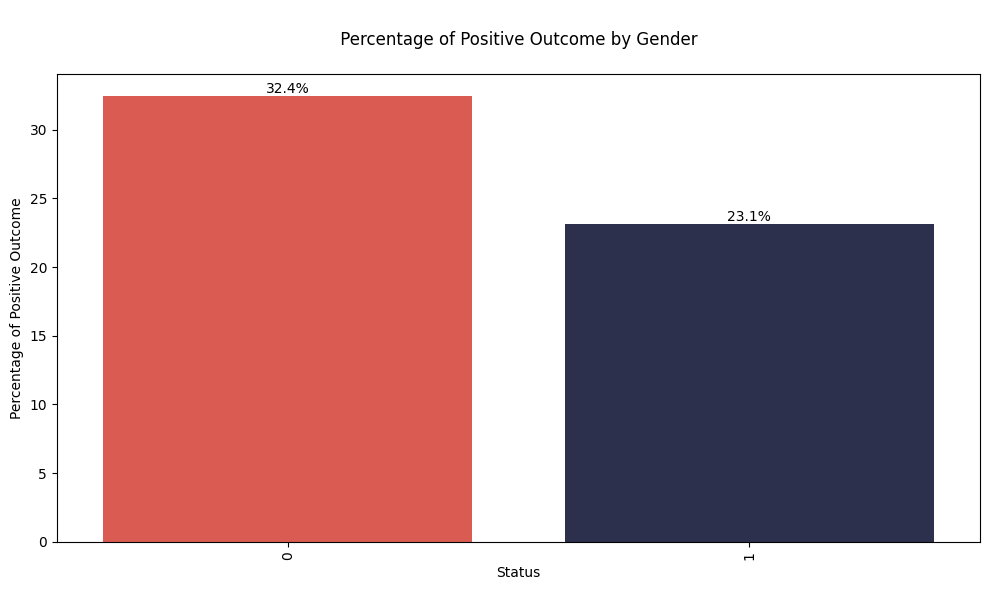

In [34]:
# Gender percentage outcomes
plt.figure(figsize=(10, 6))

sns.barplot(data=df_female, x='Female', y='percentage', palette=custom_p2)
plt.xlabel('Status')
plt.ylabel('Percentage of Positive Outcome')
plt.title('\n Percentage of Positive Outcome by Gender \n')

# percentage labels on top of the bars
for index, row in df_female.iterrows():
    plt.text(row.name, row.percentage, f"{round(row.percentage, 1)}%", ha='center', va='bottom')
plt.xticks(rotation=90, ha='center')
plt.tight_layout();


- More males with positive outcomes than women.

# Feature Engineering

Extract the year of the survey then use it to calculate the age of each participant at the time of the survey.

In [35]:
combo_df['Year_survey'] = pd.to_datetime(combo_df['Survey_date']).dt.year
combo_df['Age_survey'] = combo_df['Year_survey'] - combo_df['Birthyear']
combo_df['Age_survey'].head(2)

0    22
1    34
Name: Age_survey, dtype: int64

Next, we create a variable that indicates the number of subjects where the participants have obtained 70% or more.

In [36]:
combo_df['Subjects_over_70'] = combo_df.apply(lambda row: row.str.contains("80 - 100 %|70 - 79 %").sum(), axis=1)
combo_df['Subjects_over_70'].value_counts()

0    5954
Name: Subjects_over_70, dtype: int64

In [37]:
combo_df.head(2)

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,Schoolquintile,Female,Sa_citizen,Birthyear,Birthmonth,Target,is_train,Year_survey,Age_survey,Subjects_over_70
0,Id_eqz61wz7yn,2022-02-23,2,studying,0.0,Rural,Mpumalanga,1.0,0.0,0.0,3.0,1,1,2000,5,0.0,1,2022,22,0
1,Id_kj5k3g5wud,2023-02-06,4,unemployed,427.0,Suburb,North West,1.0,0.0,0.0,1.0,1,1,1989,4,1.0,1,2023,34,0


# Feature Selection

<ipython-input-38-78c0d6af24ea>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


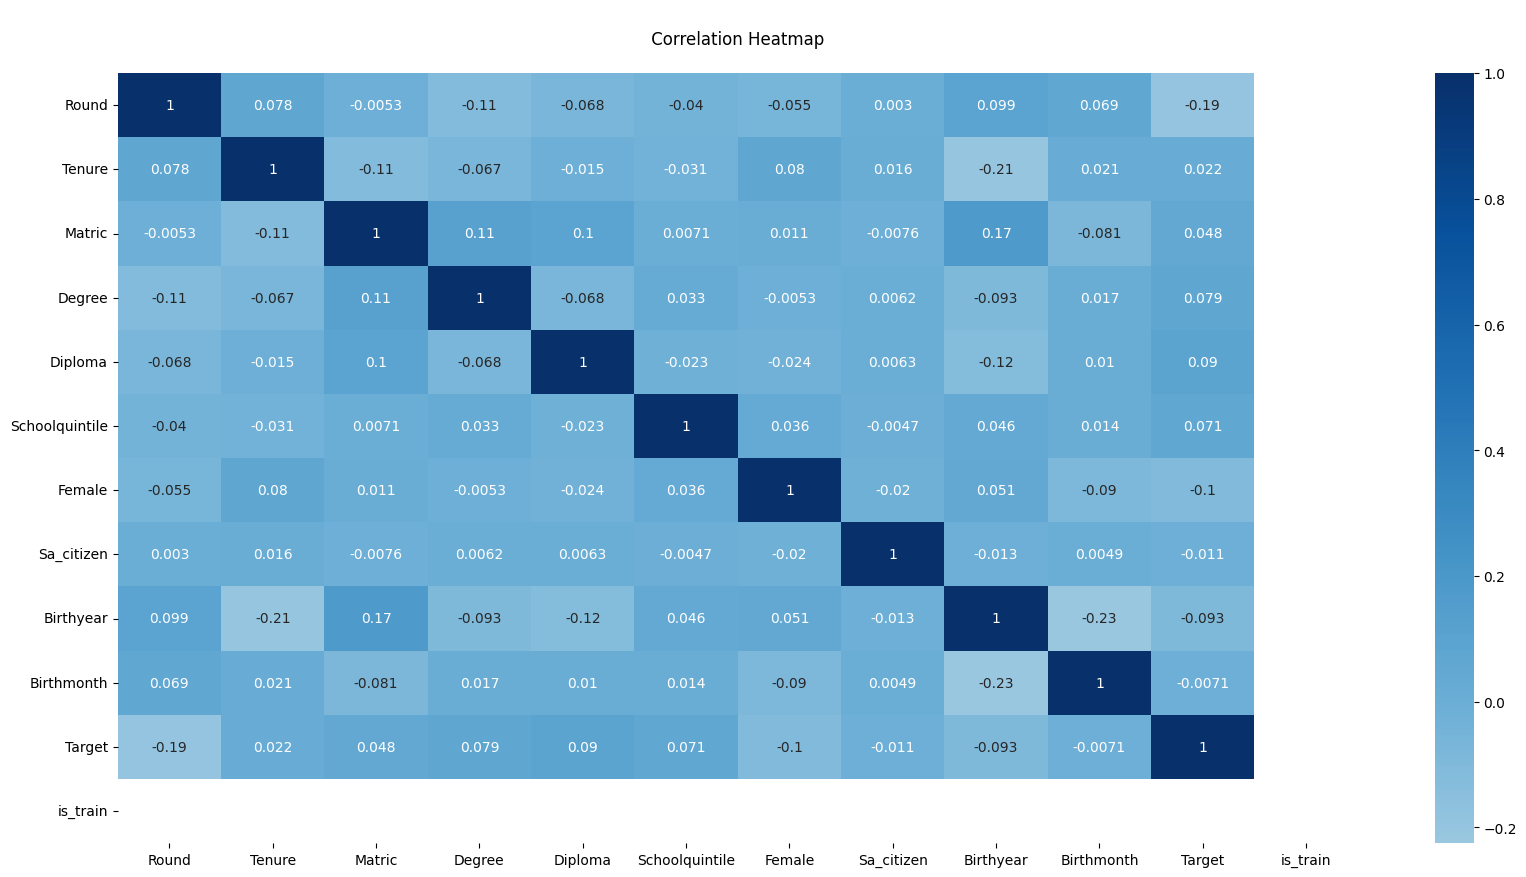

In [38]:
# calculating the correlation matrix
correlation_matrix = train_df.corr()

# heatmap of the correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', center=0)
plt.title('\n Correlation Heatmap \n');

# Feature Preprocessing

In [39]:
print(combo_df['Status'].unique())
print(combo_df['Geography'].unique())
print(combo_df['Province'].unique())
print(combo_df['Round'].unique())

['studying' 'unemployed' 'other' 'wage employed' 'self employed'
 'employment programme' 'wage and self employed']
['Rural' 'Suburb' 'Urban']
['Mpumalanga' 'North West' 'Free State' 'Eastern Cape' 'Limpopo'
 'KwaZulu-Natal' 'Gauteng' 'Western Cape' 'Northern Cape']
[2 4 3 1]


In [40]:
from sklearn.preprocessing import LabelEncoder

cats = ['Status', 'Geography', 'Province']

le = LabelEncoder()
combo_df[cats] = combo_df[cats].apply(le.fit_transform)
combo_df[['Status', 'Geography', 'Province']].head(2)

,Status,Geography,Province
0,3,0,5
1,4,1,6


In [41]:
train_df.head(2)

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,...,Mathlit,Additional_lang,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth,Target,is_train
0,Id_eqz61wz7yn,2022-02-23,2,studying,NaN,Rural,Mpumalanga,1.0,0.0,0.0,...,NaN,50 - 59 %,NaN,0 - 29 %,1,1,2000,5,0,1
1,Id_kj5k3g5wud,2023-02-06,4,unemployed,427.0,Suburb,North West,1.0,0.0,0.0,...,NaN,40 - 49 %,NaN,30 - 39 %,1,1,1989,4,1,1


In [42]:

# separate the combined DataFrame into train and test sets based on the 'is_train' column
train_cleaned = combo_df[combo_df['is_train'] == 1]
test_cleaned = combo_df[combo_df['is_train'] == 0]

# drop the 'is_train' column
train_cleaned.drop(columns=['is_train'], inplace=True)
test_cleaned.drop(columns=['is_train'], inplace=True)


<ipython-input-42-4837e07b3476>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaned.drop(columns=['is_train'], inplace=True)
<ipython-input-42-4837e07b3476>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_cleaned.drop(columns=['is_train'], inplace=True)


In [43]:
train_cleaned = train_cleaned.drop(['Person_id', 'Survey_date'], axis = 1)

In [44]:
train_cleaned.head(2)

,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,Schoolquintile,Female,Sa_citizen,Birthyear,Birthmonth,Target,Year_survey,Age_survey,Subjects_over_70
0,2,3,0.0,0,5,1.0,0.0,0.0,3.0,1,1,2000,5,0.0,2022,22,0
1,4,4,427.0,1,6,1.0,0.0,0.0,1.0,1,1,1989,4,1.0,2023,34,0


In [45]:
from sklearn.preprocessing import StandardScaler

# Separate the 'Target' column from the rest of the DataFrame
X = train_cleaned.drop(columns=['Target'])
y = train_cleaned['Target']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the feature columns (excluding the 'Target' column)
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with the scaled features
train_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Combine the scaled features with the 'Target' column
train_scaled['Target'] = y

# Binary Classification Modeling


In [46]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Separate the features and target variables
X = train_cleaned.drop('Target', axis=1)
y = train_cleaned['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost classifier
clf = xgb.XGBClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC Score:", roc_auc)


ROC AUC Score: 0.7434741990437985


In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# Separate the features and target variables
X = train_cleaned.drop('Target', axis=1)
y = train_cleaned['Target']

# Set up logistic regression model
model = RandomForestClassifier()

# Set up cross-validation strategy
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and calculate ROC AUC
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv)

# Print the mean ROC AUC score across folds
print('Mean ROC AUC:', scores.mean())


Mean ROC AUC: 0.8210914941078542


In [48]:
# Training Random Forest
X = train_cleaned.drop('Target', axis=1)
y = train_cleaned['Target']

rf_classifier = RandomForestClassifier(
    max_depth=30,
    min_samples_leaf=2,
    min_samples_split=10,
    n_estimators=200
)

rf_classifier.fit(X_train, y_train)

# Stratified cross-validation with ROC-AUC scoring
cross_val_scores = cross_val_score(
    rf_classifier,X_scaled, y, cv=5, scoring='roc_auc', n_jobs=-1
)

# Print the ROC-AUC scores for each fold
print("Cross-Validation ROC-AUC Scores:", cross_val_scores)

# Calculate and print the mean ROC-AUC score across all folds
mean_roc_auc = np.mean(cross_val_scores)
print("Mean ROC-AUC Score:", mean_roc_auc)

Cross-Validation ROC-AUC Scores: [0.82275652 0.82927326 0.85175038 0.82451313 0.83359872]
Mean ROC-AUC Score: 0.8323784021048221


In [49]:
# XGB Classifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

X = train_cleaned.drop('Target', axis=1)
y = train_cleaned['Target']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(verbosity=0)

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found during grid search
print("Best Hyperparameters: ", grid_search.best_params_)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Evaluate the model on the test set using ROC-AUC
y_prob = best_xgb_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC on Test Set:", roc_auc)

# cross-validation to assess model performance
cross_val_scores = cross_val_score(best_xgb_model, X_train, y_train, cv=5, scoring='roc_auc')
print("Cross-Validation Scores (ROC-AUC):", cross_val_scores)
print("Mean CV ROC-AUC Score:", np.mean(cross_val_scores))


Best Hyperparameters:  {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.9}
ROC-AUC on Test Set: 0.8606913227455075
Cross-Validation Scores (ROC-AUC): [0.86768527 0.86738706 0.87052503 0.84957875 0.86769231]
Mean CV ROC-AUC Score: 0.8645736832611833


In [50]:
# Train XGB
# XGBoost classifier with specified hyperparameters
xgb_classifier = XGBClassifier(
    learning_rate=0.05,
    max_depth=7,
    n_estimators=100,
    subsample=0.9,
    colsample_bytree=0.8
)

xgb_classifier.fit(X_train, y_train)
# Stratified cross-validation with ROC-AUC scoring
cross_val_scores = cross_val_score(
    xgb_classifier, X_scaled, y, cv=5, scoring='roc_auc', n_jobs=-1
)

# Print the ROC-AUC scores for each fold
print("Cross-Validation ROC-AUC Scores:", cross_val_scores)

# Calculate and print the mean ROC-AUC score across all folds
mean_roc_auc = np.mean(cross_val_scores)
print("Mean ROC-AUC Score:", mean_roc_auc)

Cross-Validation ROC-AUC Scores: [0.84324216 0.85790776 0.86869609 0.8489365  0.85582484]
Mean ROC-AUC Score: 0.8549214721472069


Status              0.103020
Tenure              0.061882
Round               0.023973
Year_survey         0.023887
Age_survey          0.011643
Birthyear           0.010412
Schoolquintile      0.009692
Female              0.005342
Province            0.004760
Geography           0.002221
Birthmonth          0.001437
Sa_citizen          0.000058
Matric              0.000000
Degree              0.000000
Diploma             0.000000
Subjects_over_70    0.000000
Name: MI Scores, dtype: float64


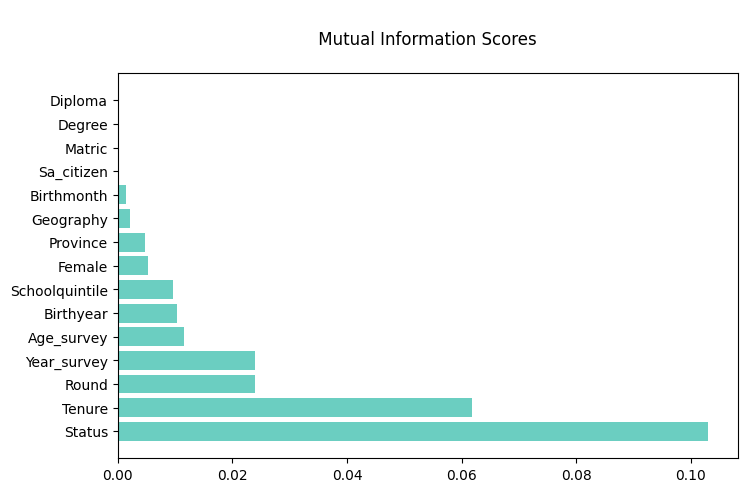

In [51]:
from sklearn.feature_selection import mutual_info_classif
# create function to get mutual information scores
def create_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(['object', 'category']):
        X[colname], _ = X[colname].factorize()
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
# create function to plot MI scores
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=False)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores, color='#6bcec1')
    plt.yticks(width, ticks)
    plt.title('\n Mutual Information Scores \n')

X = train_cleaned.copy()
y = X.pop('Target')

mi_scores = create_mi_scores(X, y)
print(mi_scores)
# plot MI scores
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(15))

In [52]:
# Get feature importances
feature_importances = xgb_classifier.feature_importances_

# Select the top 'k' features
top_10_indices = feature_importances.argsort()[-10:][::-1]
selected_features = X.columns[top_10_indices]
selected_features

Index(['Status', 'Round', 'Year_survey', 'Tenure', 'Female', 'Degree',
       'Age_survey', 'Birthyear', 'Birthmonth', 'Schoolquintile'],
      dtype='object')

In [53]:
# Get feature importances
feature_importances = best_xgb_model.feature_importances_

# Select the top 'k' features
top_10_indices = feature_importances.argsort()[-10:][::-1]
selected_features = X.columns[top_10_indices]
selected_features

Index(['Status', 'Round', 'Tenure', 'Female', 'Degree', 'Age_survey',
       'Birthyear', 'Province', 'Schoolquintile', 'Matric'],
      dtype='object')

## Retrain XGBoost with selected features

In [54]:
# Train XGB
selected_features = ['Female', 'Province', 'Tenure', 'Round', 'Status', 'Degree', 'Geography', 'Schoolquintile', 'Birthyear', 'Matric']
X = X[selected_features]

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# XGBoost classifier with specified hyperparameters
xgb_classifier = XGBClassifier(
    learning_rate=0.1,
    max_depth=6,
    n_estimators=100,
    subsample=0.9

)
xgb_classifier.fit(X_train, y_train)
# Stratified cross-validation with ROC-AUC scoring
cross_val_scores = cross_val_score(
    xgb_classifier, X_scaled, y, cv=5, scoring='roc_auc', n_jobs=-1
)

# Print the ROC-AUC scores for each fold
print("Cross-Validation ROC-AUC Scores:", cross_val_scores)

# Calculate and print the mean ROC-AUC score across all folds
mean_roc_auc = np.mean(cross_val_scores)
print("Mean ROC-AUC Score:", mean_roc_auc)

Cross-Validation ROC-AUC Scores: [0.85009941 0.86516032 0.87034305 0.85706201 0.84945947]
Mean ROC-AUC Score: 0.8584248531724533


In [55]:
# Train XGB
selected_features = selected_features = ['Female', 'Province', 'Tenure', 'Round', 'Status', 'Matric', 'Geography', 'Schoolquintile', 'Birthyear', 'Degree']
X = X[selected_features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost classifier with specified hyperparameters
xgb_clf = XGBClassifier(
    learning_rate=0.1,
    max_depth=6,
    n_estimators=100,
    subsample=0.9

)
xgb_clf.fit(X_train, y_train)
# Stratified cross-validation with ROC-AUC scoring
cross_val_scores = cross_val_score(
    xgb_classifier, X, y, cv=5, scoring='roc_auc', n_jobs=-1
)

# Print the ROC-AUC scores for each fold
print("Cross-Validation ROC-AUC Scores:", cross_val_scores)

# Calculate and print the mean ROC-AUC score across all folds
mean_roc_auc = np.mean(cross_val_scores)
print("Mean ROC-AUC Score:", mean_roc_auc)

Cross-Validation ROC-AUC Scores: [0.85431474 0.8702602  0.8688483  0.85091519 0.85002537]
Mean ROC-AUC Score: 0.8588727611983028


# Predict on the test set

In [56]:
# Test set preview
test_df.head(2)

,Person_id,Survey_date,Round,Status,Tenure,Geography,Province,Matric,Degree,Diploma,...,Math,Mathlit,Additional_lang,Home_lang,Science,Female,Sa_citizen,Birthyear,Birthmonth,is_train
0,Id_r90136smvl,2022-08-03,3,other,NaN,Urban,KwaZulu-Natal,1.0,0.0,0.0,...,0 - 29 %,NaN,50 - 59 %,NaN,40 - 49 %,0,1,2002,12,0
1,Id_wawdqhmu6s,2023-03-16,4,unemployed,979.0,Urban,Western Cape,1.0,0.0,0.0,...,NaN,NaN,40 - 49 %,NaN,NaN,1,1,1989,12,0


In [57]:
# Fit the model on training set
xgb_clf.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [58]:
# Test on test set

# Make predictions for class 1
class_1_probabilities = xgb_clf.predict_proba(test_cleaned[['Female', 'Province', 'Tenure', 'Round', 'Status', 'Matric', 'Geography', 'Schoolquintile', 'Birthyear', 'Degree']])[:, 1]

# Print the first 6 probabilities
print(class_1_probabilities[:6])

[0.9554328  0.22593467 0.09089305 0.17162049 0.03689384 0.15938479]


In [59]:
# Check the shape and data type of predictions
print(class_1_probabilities.shape)
print(class_1_probabilities.dtype)

# Check the number of rows in df_test["Person_id"]
print(len(test_cleaned["Person_id"]))

# Check if the shapes match and predictions are convertible to integers
if class_1_probabilities.shape[0] == len(test_cleaned["Person_id"]) and class_1_probabilities.dtype == 'float':
    # Create df_submission
    df_submission = pd.DataFrame({"ID": test_cleaned["Person_id"], "Target": class_1_probabilities})

(1934,)
float32
1934


In [60]:
# Create a DataFrame df_submission with two columns "ID" and "Target"
df_submission = pd.DataFrame({"ID": test_cleaned["Person_id"], "Target": class_1_probabilities.astype(float)})
print(df_submission.head(6))

                 ID    Target
4020  Id_r90136smvl  0.955433
4021  Id_wawdqhmu6s  0.225935
4022  Id_ap2czff2bu  0.090893
4023  Id_uhgink7iha  0.171620
4024  Id_5j6bzk3k81  0.036894
4025  Id_r1njgsuhs9  0.159385


Save your submission as a CSV file.

In [61]:
df_submission.to_csv('submission.csv', index=False)

# Conclusion


In conclusion, this research employed binary classification techniques using Random Forest and XGBoost models to predict youth employment probabilities in South Africa. Achieving a ROC AUC score of 0.8589 for the XGBClassifier after hyperameter tuning using GridSearchCV, the study highlighted the significance of demographic attributes, province, geography, status, tenure, schoolquintile, round, age, and education levels like matriculation and degrees in influencing employment outcomes. Interestingly, school subjects had a negligible impact. This insight enhances our understanding of youth employment dynamics.

In [62]:
end_time = time.time()

total_runtime = end_time - start_time
print(f"Total runtime: {total_runtime} seconds")


Total runtime: 514.9964632987976 seconds
